# Visualising the July 2022 Floods in NSW

According to the NRRA, the flooding in NSW started on July 27th and continued until mid-July (~17th).

In [10]:
# Necessary imports
import os
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
import matplotlib.pyplot as plt
from math import ceil
from datetime import datetime, timedelta

from ml4floods.data import utils
from ml4floods.visualization import plot_utils
from ml4floods.data.ee_download import process_metadata

## 1. Plot the final aggregate floodmap 

In [11]:
# Location of final data on the Google Bucket
path_to_aois = "gs://ml4cc_data_lake/0_DEV/1_Staging/operational/EMSR586"
postflood_aggregate_geojson = "postflood_2022-06-27_2022-07-17.geojson"

In [13]:
# Flooding start and end dates
flooding_date_start = "2022-06-27"
flooding_date_end = "2022-07-17"
flooding_date_start_dt = datetime.strptime(flooding_date_start, "%Y-%m-%d")
flooding_date_end_dt = datetime.strptime(flooding_date_end, "%Y-%m-%d")

In [19]:
# Download the final flood map from the Google bucket and check exists
fs = utils.get_filesystem(path_to_aois)
flood_geojson = os.path.join(path_to_aois, postflood_aggregate_geojson)
fs.exists(flood_geojson)

True

In [28]:
flood_geojson

'gs://ml4cc_data_lake/0_DEV/1_Staging/operational/EMSR586/postflood_2022-06-27_2022-07-17.geojson'

In [24]:
# Read the floodmap into memory
floodmap = utils.read_geojson_from_gcp(flood_geojson)
floodmap

,class,geometry
0,area_imaged,"POLYGON ((149.30449 -35.04436, 149.29995 -35.0..."
1,area_imaged,"POLYGON ((147.39662 -31.63683, 147.39641 -31.6..."
2,area_imaged,"POLYGON ((148.09970 -31.83623, 148.09991 -31.8..."
3,area_imaged,"POLYGON ((152.49992 -32.24480, 152.49970 -32.2..."
4,area_imaged,"POLYGON ((152.68708 -30.64361, 152.68701 -30.6..."
...,...,...
45321,water,"POLYGON ((152.68799 -30.43563, 152.68810 -30.4..."
45322,water,"POLYGON ((152.66238 -30.43539, 152.66237 -30.4..."
45323,water,"POLYGON ((152.68487 -30.43490, 152.68508 -30.4..."
45324,water,"POLYGON ((152.69883 -30.43548, 152.69924 -30.4..."


<AxesSubplot:>

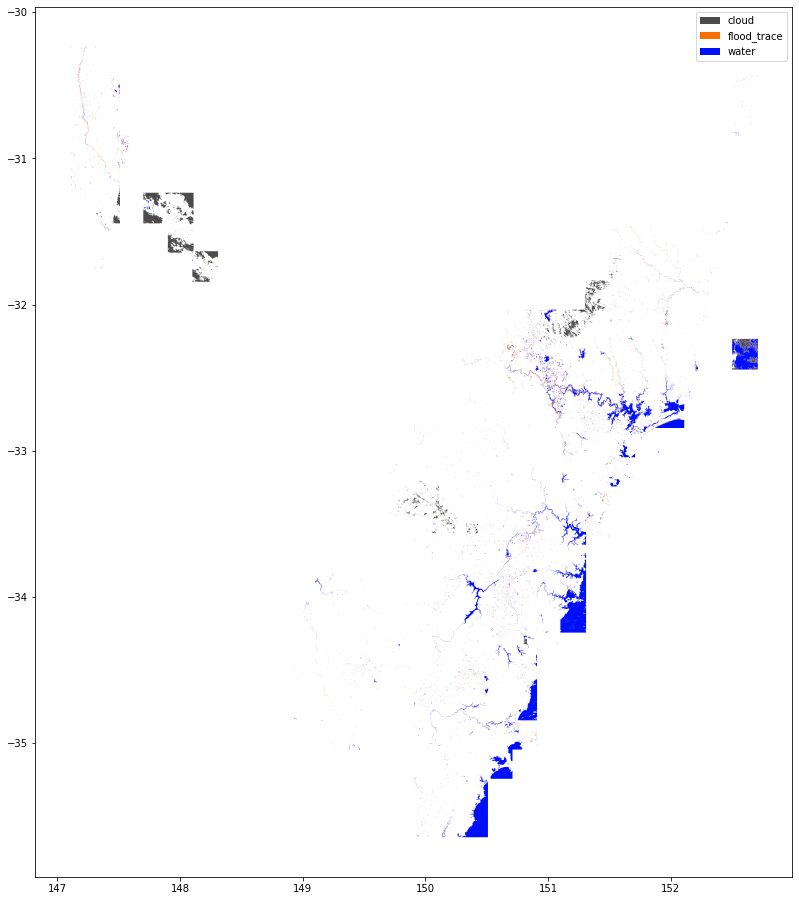

In [27]:
# Plot the floodmap
plot_utils.plot_floodmap(floodmap,legend=True, figsize=(16, 16))

## 2. Plot the mean cloud coverage and available images